In [79]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
df = pd.read_csv("./kddcup99-dataset/kddcup99.csv")

In [81]:
df.shape

(494020, 42)

In [82]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'lnum_compromised', 'lroot_shell',
       'lsu_attempted', 'lnum_root', 'lnum_file_creations', 'lnum_shells',
       'lnum_access_files', 'lnum_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'label'],
      dtype='object')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494020 entries, 0 to 494019
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     494020 non-null  int64  
 1   protocol_type                494020 non-null  object 
 2   service                      494020 non-null  object 
 3   flag                         494020 non-null  object 
 4   src_bytes                    494020 non-null  int64  
 5   dst_bytes                    494020 non-null  int64  
 6   land                         494020 non-null  int64  
 7   wrong_fragment               494020 non-null  int64  
 8   urgent                       494020 non-null  int64  
 9   hot                          494020 non-null  int64  
 10  num_failed_logins            494020 non-null  int64  
 11  logged_in                    494020 non-null  int64  
 12  lnum_compromised             494020 non-null  int64  
 13 

In [84]:
input_cols = list(df.columns)[1:-1]
target_col = 'label'
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()[:-1]

<AxesSubplot:>

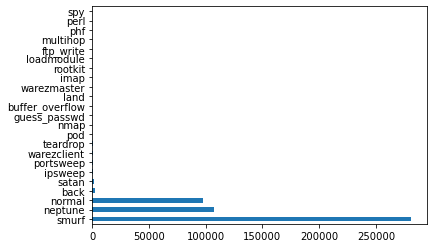

In [85]:
count_labels = df['label'].value_counts()
count_labels.plot(kind = "barh")


In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])

In [87]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

target = df['label']
df['label'] = le.fit_transform(target)
df['protocol_type'] = le.fit_transform(df['protocol_type'])
df['service'] = le.fit_transform(df['service'])
df['flag'] = le.fit_transform(df['flag'])

In [88]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)
print(train_df.shape)
print(test_df.shape)

(345814, 42)
(148206, 42)


In [92]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()
test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators = 3, random_state=42))
sel.fit(train_inputs, train_targets)
selected_feat = train_inputs.columns[(sel.get_support())]
print(selected_feat)
print(len(selected_feat))

Index(['protocol_type', 'service', 'diff_srv_rate', 'dst_host_same_srv_rate'], dtype='object')
4


In [94]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
rf.fit(train_inputs[selected_feat], train_targets)
preds_rf = rf.predict(test_inputs[selected_feat])
from sklearn.metrics import accuracy_score
score_rf = accuracy_score(test_targets, preds_rf)
score_rf


0.9913498778726907

In [95]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc.fit(train_inputs[selected_feat], train_targets)
preds_dc = dc.predict(test_inputs[selected_feat])
score_dc = accuracy_score(test_targets, preds_dc)
score_dc

0.9911339621877657

In [96]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_inputs[selected_feat], train_targets)
preds_knn = knn.predict(test_inputs[selected_feat])
score_knn = accuracy_score(test_targets, preds_knn)
score_knn

0.9892177104840559

In [98]:
# visto nesse site
# https://blog.jovian.ai/intrusion-detection-in-kdd99-dataset-using-machine-learning-ad25e6c07c25

model = RandomForestClassifier()
model.fit(train_inputs[selected_feat], train_targets)
(pd.Series(model.feature_importances_, index=train_inputs.columns)
   .nlargest(15)
   .plot(kind='barh')) 

ValueError: Length of values (4) does not match length of index (40)

In [17]:
# sites para olhar
# https://blog.jovian.ai/intrusion-detection-in-kdd99-dataset-using-machine-learning-ad25e6c07c25
# https://medium.com/geekculture/network-intrusion-detection-using-deep-learning-bcc91e9b999d
# https://core.ac.uk/download/pdf/301297960.pdf

Fazendo com apenas 4 neurônios

In [103]:
df4 = pd.read_csv("./kddcup99-dataset/kddcup99.csv")

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df4[numeric_cols])
df4[numeric_cols] = scaler.transform(df4[numeric_cols])

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

target = df4['label']
df4['label'] = le.fit_transform(target)
df4['protocol_type'] = le.fit_transform(df4['protocol_type'])
df4['service'] = le.fit_transform(df4['service'])

from sklearn.model_selection import train_test_split
train_df4, test_df4 = train_test_split(df4, test_size=0.3, random_state=42)

train_inputs = train_df4[selected_feat].copy()
train_targets = train_df4[target_col].copy()
test_inputs = test_df4[selected_feat].copy()
test_targets = test_df4[target_col].copy()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
rf.fit(train_inputs[selected_feat], train_targets)
preds_rf = rf.predict(test_inputs[selected_feat])
from sklearn.metrics import accuracy_score
score_rf = accuracy_score(test_targets, preds_rf)
score_rf


0.9913498778726907

In [108]:
df4_new = test_inputs
df4_new['label'] = test_targets
df4_new

,protocol_type,service,diff_srv_rate,dst_host_same_srv_rate,label
317920,0,14,0.00,1.00,18
171422,0,14,0.00,1.00,18
381807,1,45,0.15,0.04,9
87346,1,22,0.00,1.00,11
57449,1,45,0.06,0.01,9
...,...,...,...,...,...
390162,1,45,0.05,0.07,9
86378,1,50,0.00,0.37,11
219136,0,14,0.00,1.00,18
49930,0,14,0.00,1.00,18


In [118]:
df5 = pd.read_csv("./kddcup99-dataset/kddcup99.csv")

In [125]:
df5['protocol_type'].unique()

array(['tcp', 'udp', 'icmp'], dtype=object)